In [6]:
import sys

sys.path.append('/Users/huberyhu/Desktop/SURP/im_deinfluence/model_code')

import networkx as nx
import experiment_framework as ef
import matplotlib.pyplot as plt
import pickle
import copy

In [7]:
# Load the graph from the file
save_path = '/Users/huberyhu/Desktop/SURP/im_deinfluence/network_data/email_eu_core_graph.gpickle'
try:
    with open(save_path, 'rb') as f:
        G = pickle.load(f)
    print(f"Graph loaded from {save_path}")
except Exception as e:
    print(f"An error occurred while loading the graph: {e}")

Graph loaded from /Users/huberyhu/Desktop/SURP/im_deinfluence/network_data/email_eu_core_graph.gpickle


In [8]:
graph_type = "email_eu_core_graph"
num_nodes = G.number_of_nodes()
influencers_cascade_steps = 2
num_influencers = 10
k_deinfluencers_ls = [0,1,2,3,4,5,6,7,8,9,10]  # Different values of k to test
general_cascade_steps = 2
num_avg_runs = 5
num_edges = G.number_of_edges()

In [9]:
model = ef.run_influence_cascade(G, num_influencers=num_influencers, steps=influencers_cascade_steps, selection_method='random')

# Evaluate the influence and deinfluence
num_influenced = model.evaluate_influence()
num_deinfluenced = model.evaluate_deinfluence()
num_susceptible = model.evaluate_susceptible()

# Create a deep copy of the model
model_fixed_influencers = copy.deepcopy(model)

# Evaluate the influence and deinfluence
num_influenced = model_fixed_influencers.evaluate_influence()
num_deinfluenced = model_fixed_influencers.evaluate_deinfluence()
num_susceptible = model_fixed_influencers.evaluate_susceptible()

print(f"Number of influenced nodes: {num_influenced}")
print(f"Number of deinfluenced nodes: {num_deinfluenced}")
print(f"Number of susceptible nodes: {num_susceptible}")
print('influencer', model.selected_influencers)

Number of influenced nodes: 754
Number of deinfluenced nodes: 0
Number of susceptible nodes: 251
influencer {352, 491, 462, 975, 495, 468, 281, 698, 283, 30}


In [10]:
deinfluencers_list = ef.select_deinfluencers(k_deinfluencers_ls, model_fixed_influencers)
results = ef.average_results(deinfluencers_list, model_fixed_influencers, num_runs=num_avg_runs, steps=general_cascade_steps)

/Users/huberyhu/Desktop/SURP/im_deinfluence/model_code/experiment_framework.py:482: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


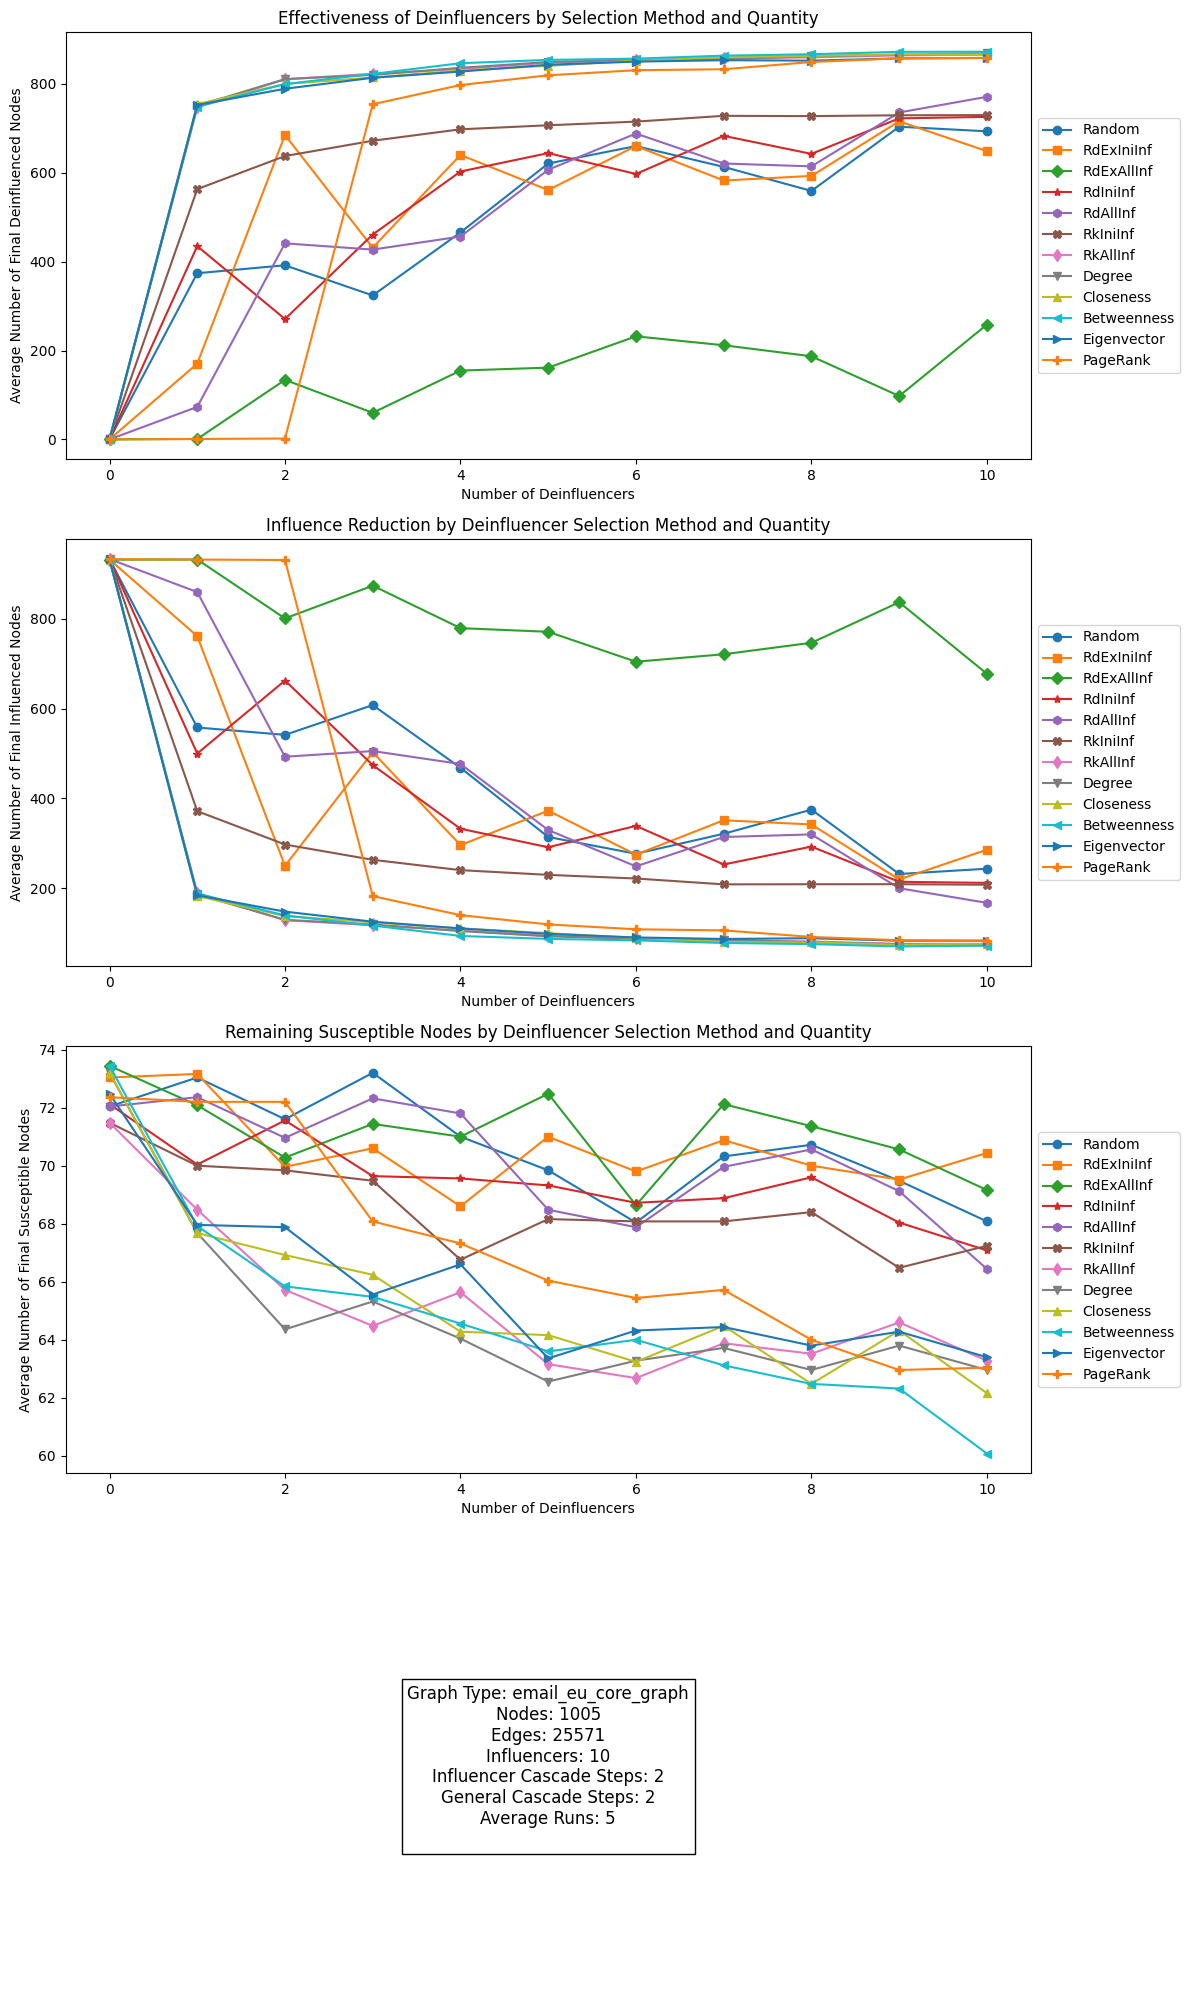

In [11]:
ef.plot_deinfluencer_results_exp1(results, G, graph_type, num_nodes, num_edges, num_influencers, influencers_cascade_steps, general_cascade_steps, num_avg_runs)